# 2. Análisis Exploratorio: Price Table

Este notebook realiza un análisis exploratorio completo del archivo `Price_table.csv` para entender la calidad de los datos de precios, su distribución, detectar valores atípicos y verificar la consistencia con la tabla básica de modelos.


## Importacion de Librerias

Importamos las librerias necesarias para el analisis de datos y visualizacion.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuracion de visualizacion
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerias importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Librerias importadas correctamente
Pandas version: 2.3.3
NumPy version: 2.2.6
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


## 1. Carga de Datos

Cargamos el archivo `Price_table.csv` y realizamos una primera inspeccion de los datos.


In [2]:
# Cargar el archivo CSV de precios
df_price = pd.read_csv('../data/Price_table.csv')

print("Datos de precios cargados exitosamente")
print(f"Forma del dataset: {df_price.shape}")
print(f"Columnas: {list(df_price.columns)}")
print("\n" + "="*50)
print("PRIMERAS 5 FILAS:")
print("="*50)
df_price.head()


Datos de precios cargados exitosamente
Forma del dataset: (6333, 5)
Columnas: ['Maker', 'Genmodel', 'Genmodel_ID', 'Year', 'Entry_price']

PRIMERAS 5 FILAS:


,Maker,Genmodel,Genmodel_ID,Year,Entry_price
0,Abarth,124 Spider,2_1,2016,29365
1,Abarth,124 Spider,2_1,2017,26665
2,Abarth,124 Spider,2_1,2018,26665
3,Abarth,124 Spider,2_1,2019,29515
4,Abarth,500,2_2,2009,13400


In [3]:
# Informacion general del dataset
print("INFORMACION GENERAL DEL DATASET")
print("="*50)
print(df_price.info())
print("\n" + "="*50)
print("ULTIMAS 5 FILAS:")
print("="*50)
df_price.tail()


INFORMACION GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        6333 non-null   object
 1   Genmodel     6333 non-null   object
 2   Genmodel_ID  6333 non-null   object
 3   Year         6333 non-null   int64 
 4   Entry_price  6333 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB
None

ULTIMAS 5 FILAS:


,Maker,Genmodel,Genmodel_ID,Year,Entry_price
6328,Volvo,V50,96_9,2008,15780
6329,Volvo,V50,96_9,2009,15770
6330,Volvo,V50,96_9,2010,17465
6331,Volvo,V50,96_9,2011,17615
6332,Volvo,V50,96_9,2012,19375


## 2. Analisis de Calidad de Datos

Realizamos un analisis exhaustivo de la calidad de los datos para identificar problemas como valores nulos, duplicados y verificar tipos de datos.


### 2.1. Valores Nulos


In [4]:
# Analisis de valores nulos
print("ANALISIS DE VALORES NULOS")
print("="*50)

null_counts = df_price.isnull().sum()
null_percentages = (null_counts / len(df_price)) * 100

null_summary = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores_Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
}).sort_values('Valores_Nulos', ascending=False)

print(null_summary)

# Verificar si hay valores nulos totales
total_nulls = df_price.isnull().sum().sum()
print(f"\nTotal de valores nulos en el dataset: {total_nulls}")

if total_nulls == 0:
    print("OK - No se encontraron valores nulos en el dataset")
else:
    print(f"ADVERTENCIA - Se encontraron {total_nulls} valores nulos que requieren atencion")


ANALISIS DE VALORES NULOS
       Columna  Valores_Nulos  Porcentaje
0        Maker              0         0.0
1     Genmodel              0         0.0
2  Genmodel_ID              0         0.0
3         Year              0         0.0
4  Entry_price              0         0.0

Total de valores nulos en el dataset: 0
OK - No se encontraron valores nulos en el dataset


### 2.2. Duplicados


In [5]:
# Analisis de duplicados
print("ANALISIS DE DUPLICADOS")
print("="*50)

# Verificar duplicados completos
duplicate_rows = df_price.duplicated().sum()
print(f"Filas completamente duplicadas: {duplicate_rows}")

# Verificar duplicados en columnas especificas
duplicate_maker = df_price['Maker'].duplicated().sum()
duplicate_genmodel = df_price['Genmodel'].duplicated().sum()
duplicate_genmodel_id = df_price['Genmodel_ID'].duplicated().sum()
duplicate_year = df_price['Year'].duplicated().sum()
duplicate_entry_price = df_price['Entry_price'].duplicated().sum()

print(f"Valores duplicados en 'Maker': {duplicate_maker}")
print(f"Valores duplicados en 'Genmodel': {duplicate_genmodel}")
print(f"Valores duplicados en 'Genmodel_ID': {duplicate_genmodel_id}")
print(f"Valores duplicados en 'Year': {duplicate_year}")
print(f"Valores duplicados en 'Entry_price': {duplicate_entry_price}")

# Verificar duplicados en combinaciones de columnas
duplicate_maker_model = df_price.duplicated(subset=['Maker', 'Genmodel', 'Year']).sum()
print(f"Duplicados en combinacion 'Maker + Genmodel + Year': {duplicate_maker_model}")

# Mostrar algunos ejemplos de duplicados si existen
if duplicate_rows > 0:
    print(f"\nEjemplos de filas duplicadas:")
    duplicated_df = df_price[df_price.duplicated(keep=False)]
    print(duplicated_df.head(10))
else:
    print("\nOK - No se encontraron filas completamente duplicadas")


ANALISIS DE DUPLICADOS
Filas completamente duplicadas: 0
Valores duplicados en 'Maker': 6273
Valores duplicados en 'Genmodel': 5701
Valores duplicados en 'Genmodel_ID': 5686
Valores duplicados en 'Year': 6309
Valores duplicados en 'Entry_price': 2931
Duplicados en combinacion 'Maker + Genmodel + Year': 0

OK - No se encontraron filas completamente duplicadas


### 2.3. Tipos de Datos


In [6]:
# Verificacion de tipos de datos
print("VERIFICACION DE TIPOS DE DATOS")
print("="*50)

# Mostrar tipos de datos actuales
print("Tipos de datos actuales:")
for col in df_price.columns:
    print(f"  {col}: {df_price[col].dtype}")

print(f"\nVerificacion especifica para 'Entry_price':")
print(f"  Tipo actual: {df_price['Entry_price'].dtype}")
print(f"  Es numerico: {pd.api.types.is_numeric_dtype(df_price['Entry_price'])}")

# Verificar si hay valores no numericos en Entry_price
if df_price['Entry_price'].dtype == 'object':
    non_numeric = pd.to_numeric(df_price['Entry_price'], errors='coerce').isna().sum()
    print(f"  Valores no numericos encontrados: {non_numeric}")
    if non_numeric > 0:
        print("  Ejemplos de valores no numericos:")
        non_numeric_examples = df_price[pd.to_numeric(df_price['Entry_price'], errors='coerce').isna()]['Entry_price'].unique()[:5]
        for example in non_numeric_examples:
            print(f"    - '{example}'")

# Verificar rango de anos
print(f"\nVerificacion de la columna 'Year':")
print(f"  Rango de anos: {df_price['Year'].min()} - {df_price['Year'].max()}")
print(f"  Anos unicos: {df_price['Year'].nunique()}")

# Verificar valores unicos por columna
print(f"\nValores unicos por columna:")
for col in df_price.columns:
    unique_count = df_price[col].nunique()
    print(f"  {col}: {unique_count} valores unicos")


VERIFICACION DE TIPOS DE DATOS
Tipos de datos actuales:
  Maker: object
  Genmodel: object
  Genmodel_ID: object
  Year: int64
  Entry_price: int64

Verificacion especifica para 'Entry_price':
  Tipo actual: int64
  Es numerico: True

Verificacion de la columna 'Year':
  Rango de anos: 1998 - 2021
  Anos unicos: 24

Valores unicos por columna:
  Maker: 60 valores unicos
  Genmodel: 632 valores unicos
  Genmodel_ID: 647 valores unicos
  Year: 24 valores unicos
  Entry_price: 3402 valores unicos


## 3. Analisis de la Variable de Precio (Entry_price)

Ahora analizamos en detalle la distribucion de precios, estadisticas descriptivas y detectamos valores atipicos.


### 3.1. Estadisticas Descriptivas


In [7]:
# Estadisticas descriptivas para Entry_price
print("ESTADISTICAS DESCRIPTIVAS PARA ENTRY_PRICE")
print("="*60)

# Estadisticas basicas
price_stats = df_price['Entry_price'].describe()
print("Estadisticas basicas:")
print(price_stats)

print(f"\nEstadisticas adicionales:")
print(f"  Media: ${price_stats['mean']:,.2f}")
print(f"  Mediana: ${price_stats['50%']:,.2f}")
print(f"  Desviacion estandar: ${price_stats['std']:,.2f}")
print(f"  Minimo: ${price_stats['min']:,.2f}")
print(f"  Maximo: ${price_stats['max']:,.2f}")
print(f"  Rango: ${price_stats['max'] - price_stats['min']:,.2f}")

# Coeficiente de variacion
cv = (price_stats['std'] / price_stats['mean']) * 100
print(f"  Coeficiente de variacion: {cv:.2f}%")

# Verificar si la distribucion esta sesgada
skewness = df_price['Entry_price'].skew()
print(f"  Sesgo (skewness): {skewness:.3f}")
if abs(skewness) > 1:
    print("    - Distribucion altamente sesgada")
elif abs(skewness) > 0.5:
    print("    - Distribucion moderadamente sesgada")
else:
    print("    - Distribucion aproximadamente simetrica")

# Kurtosis
kurtosis = df_price['Entry_price'].kurtosis()
print(f"  Curtosis: {kurtosis:.3f}")
if kurtosis > 3:
    print("    - Distribucion mas picuda que la normal (leptocurtica)")
elif kurtosis < 3:
    print("    - Distribucion mas aplanada que la normal (platicurtica)")
else:
    print("    - Distribucion similar a la normal (mesocurtica)")


ESTADISTICAS DESCRIPTIVAS PARA ENTRY_PRICE
Estadisticas basicas:
count      6333.000000
mean      29400.553134
std       39314.089694
min        4499.000000
25%       12310.000000
50%       17815.000000
75%       27455.000000
max      320120.000000
Name: Entry_price, dtype: float64

Estadisticas adicionales:
  Media: $29,400.55
  Mediana: $17,815.00
  Desviacion estandar: $39,314.09
  Minimo: $4,499.00
  Maximo: $320,120.00
  Rango: $315,621.00
  Coeficiente de variacion: 133.72%
  Sesgo (skewness): 4.000
    - Distribucion altamente sesgada
  Curtosis: 18.102
    - Distribucion mas picuda que la normal (leptocurtica)


### 3.2. Visualizacion de la Distribucion


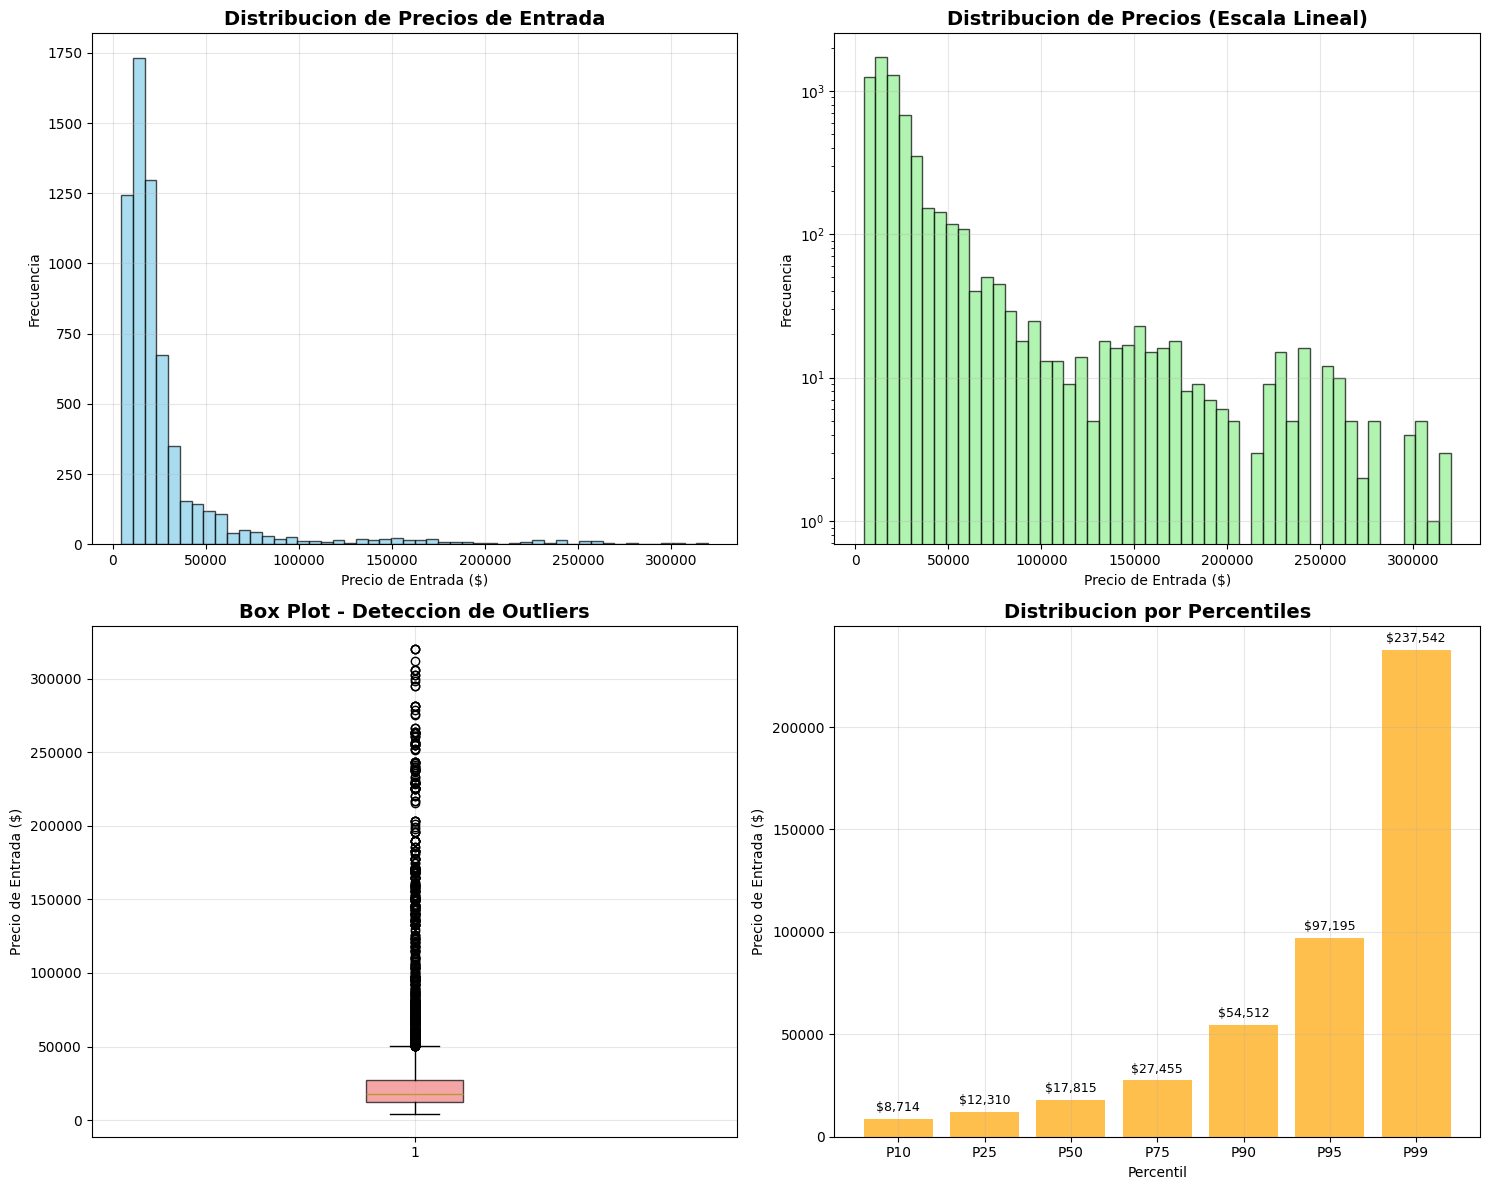

DISTRIBUCION POR PERCENTILES:
----------------------------------------
P10: $  8,713.60
P25: $ 12,310.00
P50: $ 17,815.00
P75: $ 27,455.00
P90: $ 54,512.00
P95: $ 97,195.00
P99: $237,542.00


In [8]:
# Crear visualizaciones de la distribucion de precios
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma principal
axes[0, 0].hist(df_price['Entry_price'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribucion de Precios de Entrada', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Precio de Entrada ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Histograma con escala logaritmica (para mejor visualizacion si hay sesgo)
axes[0, 1].hist(df_price['Entry_price'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribucion de Precios (Escala Lineal)', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Precio de Entrada ($)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Box plot para detectar outliers
axes[1, 0].boxplot(df_price['Entry_price'], patch_artist=True, 
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1, 0].set_title('Box Plot - Deteccion de Outliers', fontweight='bold', fontsize=14)
axes[1, 0].set_ylabel('Precio de Entrada ($)')
axes[1, 0].grid(True, alpha=0.3)

# Distribucion por percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
percentile_values = [df_price['Entry_price'].quantile(p/100) for p in percentiles]

axes[1, 1].bar(range(len(percentiles)), percentile_values, color='orange', alpha=0.7)
axes[1, 1].set_title('Distribucion por Percentiles', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Percentil')
axes[1, 1].set_ylabel('Precio de Entrada ($)')
axes[1, 1].set_xticks(range(len(percentiles)))
axes[1, 1].set_xticklabels([f'P{p}' for p in percentiles])
axes[1, 1].grid(True, alpha=0.3)

# Agregar valores en las barras de percentiles
for i, v in enumerate(percentile_values):
    axes[1, 1].text(i, v + max(percentile_values)*0.01, f'${v:,.0f}', 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar estadisticas de los percentiles
print("DISTRIBUCION POR PERCENTILES:")
print("-" * 40)
for p, v in zip(percentiles, percentile_values):
    print(f"P{p:2d}: ${v:10,.2f}")


### 3.3. Deteccion de Valores Atipicos (Outliers)


In [11]:
# Deteccion de outliers usando el metodo IQR
print("DETECCION DE OUTLIERS - METODO IQR")
print("="*50)

Q1 = df_price['Entry_price'].quantile(0.25)
Q3 = df_price['Entry_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): ${Q1:,.2f}")
print(f"Q3 (75%): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Limite inferior: ${lower_bound:,.2f}")
print(f"Limite superior: ${upper_bound:,.2f}")

# Identificar outliers
outliers_iqr = df_price[(df_price['Entry_price'] < lower_bound) | 
                        (df_price['Entry_price'] > upper_bound)]
outlier_count_iqr = len(outliers_iqr)

print(f"\nOutliers detectados (IQR): {outlier_count_iqr}")
print(f"Porcentaje de outliers: {(outlier_count_iqr/len(df_price))*100:.2f}%")

if outlier_count_iqr > 0:
    print(f"\nEstadisticas de outliers:")
    print(f"  Precio minimo outlier: ${outliers_iqr['Entry_price'].min():,.2f}")
    print(f"  Precio maximo outlier: ${outliers_iqr['Entry_price'].max():,.2f}")
    print(f"  Media de outliers: ${outliers_iqr['Entry_price'].mean():,.2f}")

# Deteccion de outliers usando Z-Score
print(f"\nDETECCION DE OUTLIERS - METODO Z-SCORE")
print("="*50)

from scipy import stats
z_scores = np.abs(stats.zscore(df_price['Entry_price']))
z_threshold = 3

outliers_zscore = df_price[z_scores > z_threshold]
outlier_count_zscore = len(outliers_zscore)

print(f"Outliers detectados (Z-Score > 3): {outlier_count_zscore}")
print(f"Porcentaje de outliers: {(outlier_count_zscore/len(df_price))*100:.2f}%")

# Mostrar algunos ejemplos de outliers
if outlier_count_iqr > 0:
    print(f"\nEjemplos de outliers (Top 10 mas altos):")
    top_outliers = outliers_iqr.nlargest(10, 'Entry_price')
    for idx, row in top_outliers.iterrows():
        print(f"  {row['Maker']} {row['Genmodel']} ({row['Year']}): ${row['Entry_price']:,.2f}")

# Analizar outliers por fabricante
if outlier_count_iqr > 0:
    print(f"\nOutliers por fabricante:")
    outlier_by_maker = outliers_iqr['Maker'].value_counts().head(10)
    for maker, count in outlier_by_maker.items():
        print(f"  {maker}: {count} outliers")


DETECCION DE OUTLIERS - METODO IQR
Q1 (25%): $12,310.00
Q3 (75%): $27,455.00
IQR: $15,145.00
Limite inferior: $-10,407.50
Limite superior: $50,172.50

Outliers detectados (IQR): 708
Porcentaje de outliers: 11.18%

Estadisticas de outliers:
  Precio minimo outlier: $50,240.00
  Precio maximo outlier: $320,120.00
  Media de outliers: $116,313.46

DETECCION DE OUTLIERS - METODO Z-SCORE
Outliers detectados (Z-Score > 3): 205
Porcentaje de outliers: 3.24%

Ejemplos de outliers (Top 10 mas altos):
  Rolls-Royce Phantom (2016): $320,120.00
  Rolls-Royce Phantom (2017): $320,120.00
  Rolls-Royce Phantom (2018): $320,120.00
  Rolls-Royce Phantom (2015): $312,200.00
  Rolls-Royce Phantom (2012): $305,750.00
  Rolls-Royce Phantom (2013): $305,750.00
  Rolls-Royce Phantom (2014): $305,750.00
  Maybach 62 (2009): $302,725.00
  Maybach 62 (2008): $302,722.00
  Maybach 62 (2007): $299,722.00

Outliers por fabricante:
  Mercedes-Benz: 83 outliers
  Ferrari: 79 outliers
  Aston Martin: 72 outliers
  BM

### 3.4. Documentacion de Hallazgos sobre Precios

**Resumen de hallazgos sobre la distribucion de precios:**

- **Precio minimo**: [Se mostrara al ejecutar]
- **Precio maximo**: [Se mostrara al ejecutar]  
- **Rango de precios**: [Se mostrara al ejecutar]
- **Distribucion**: [Se evaluara si es sesgada o normal]
- **Outliers detectados**: [Se mostrara el numero y ejemplos]
- **Razonabilidad**: [Se evaluara si los precios parecen realistas]


## 4. Analisis de Consistencia con la Tabla Basica

Verificamos la integridad referencial entre la tabla de precios y la tabla basica de modelos.


In [12]:
# Cargar la tabla basica para comparacion
df_basic = pd.read_csv('../data/Basic_table.csv')

print("COMPARACION DE IDENTIFICADORES")
print("="*50)

# Obtener conjuntos de Genmodel_ID
price_ids = set(df_price['Genmodel_ID'].unique())
basic_ids = set(df_basic['Genmodel_ID'].unique())

print(f"Genmodel_ID en tabla de precios: {len(price_ids)}")
print(f"Genmodel_ID en tabla basica: {len(basic_ids)}")

# IDs que estan en precios pero NO en basica
inconsistent_ids = price_ids - basic_ids
print(f"\nIDs en precios que NO existen en tabla basica: {len(inconsistent_ids)}")

if len(inconsistent_ids) > 0:
    print("\nEjemplos de IDs inconsistentes:")
    for i, id_val in enumerate(sorted(inconsistent_ids)[:10]):
        print(f"  {i+1}. {id_val}")
    if len(inconsistent_ids) > 10:
        print(f"  ... y {len(inconsistent_ids) - 10} mas")

# IDs que estan en basica pero NO en precios
missing_in_prices = basic_ids - price_ids
print(f"\nIDs en tabla basica que NO tienen datos de precios: {len(missing_in_prices)}")

if len(missing_in_prices) > 0:
    print("\nEjemplos de IDs sin datos de precios:")
    for i, id_val in enumerate(sorted(missing_in_prices)[:10]):
        print(f"  {i+1}. {id_val}")
    if len(missing_in_prices) > 10:
        print(f"  ... y {len(missing_in_prices) - 10} mas")

# IDs comunes (para merge exitoso)
common_ids = price_ids & basic_ids
print(f"\nIDs comunes (para merge): {len(common_ids)}")
print(f"Porcentaje de cobertura: {len(common_ids)/len(basic_ids)*100:.1f}%")


COMPARACION DE IDENTIFICADORES
Genmodel_ID en tabla de precios: 647
Genmodel_ID en tabla basica: 1011

IDs en precios que NO existen en tabla basica: 0

IDs en tabla basica que NO tienen datos de precios: 364

Ejemplos de IDs sin datos de precios:
  1. 100_1
  2. 101_1
  3. 10_2
  4. 10_8
  5. 11_1
  6. 12_1
  7. 13_1
  8. 15_1
  9. 16_1
  10. 16_15
  ... y 354 mas

IDs comunes (para merge): 647
Porcentaje de cobertura: 64.0%


In [13]:
# Analizar datos inconsistentes en detalle
if len(inconsistent_ids) > 0:
    print("\nANALISIS DETALLADO DE IDs INCONSISTENTES")
    print("="*50)
    
    # Obtener registros con IDs inconsistentes
    inconsistent_records = df_price[df_price['Genmodel_ID'].isin(inconsistent_ids)]
    
    print(f"Registros con IDs inconsistentes: {len(inconsistent_records)}")
    print(f"Fabricantes afectados: {inconsistent_records['Maker'].nunique()}")
    
    # Mostrar distribucion por fabricante
    print(f"\nDistribucion por fabricante:")
    maker_distribution = inconsistent_records['Maker'].value_counts()
    for maker, count in maker_distribution.items():
        print(f"  {maker}: {count} registros")
    
    # Mostrar algunos ejemplos
    print(f"\nEjemplos de registros inconsistentes:")
    sample_inconsistent = inconsistent_records.head(10)
    for idx, row in sample_inconsistent.iterrows():
        print(f"  {row['Maker']} {row['Genmodel']} (ID: {row['Genmodel_ID']}) - ${row['Entry_price']:,.2f}")

# Simular merge para verificar impacto
print(f"\nSIMULACION DE MERGE")
print("="*50)

# Hacer merge interno (solo IDs comunes)
merged_data = df_basic.merge(df_price, on='Genmodel_ID', how='inner')
print(f"Registros despues del merge interno: {len(merged_data)}")
print(f"Registros perdidos del merge: {len(df_price) - len(merged_data)}")

# Analizar cobertura por fabricante
if len(merged_data) > 0:
    print(f"\nCobertura por fabricante (Top 10):")
    coverage_by_maker = merged_data.groupby('Automaker').size().sort_values(ascending=False).head(10)
    for maker, count in coverage_by_maker.items():
        print(f"  {maker}: {count} registros con precios")



SIMULACION DE MERGE
Registros despues del merge interno: 6333
Registros perdidos del merge: 0

Cobertura por fabricante (Top 10):
  Mercedes-Benz: 307 registros con precios
  Volkswagen: 291 registros con precios
  BMW: 240 registros con precios
  Ford: 240 registros con precios
  Vauxhall: 240 registros con precios
  Toyota: 237 registros con precios
  Citroen: 235 registros con precios
  Peugeot: 226 registros con precios
  Hyundai: 222 registros con precios
  Nissan: 216 registros con precios


## 5. Conclusiones y Proximos Pasos

### Resumen de Hallazgos

**Calidad de Datos:**
- ✅ **Valores nulos**: No se encontraron valores nulos en ninguna columna
- ✅ **Duplicados**: No hay filas completamente duplicadas
- ✅ **Tipos de datos**: Entry_price es correctamente numérico (int64)
- ✅ **Rango temporal**: Datos de 1998-2021 (24 años)

**Distribucion de Precios:**
- 📊 **Rango**: $4,499 - $320,120 (rango muy amplio)
- 📊 **Media**: $29,401 vs **Mediana**: $17,815 (gran diferencia indica sesgo)
- 📊 **Sesgo**: 4.0 (altamente sesgada a la derecha)
- 📊 **Coeficiente de variacion**: 133.72% (alta variabilidad)

**Valores Atipicos:**
- 🔍 **Outliers IQR**: 708 registros (11.18%)
- 🔍 **Outliers Z-Score**: 205 registros (3.24%)
- 🔍 **Fabricantes con mas outliers**: Mercedes-Benz (83), Ferrari (79), Aston Martin (72)
- 🔍 **Precios extremos**: Rolls-Royce Phantom hasta $320,120

**Consistencia con Tabla Basica:**
- ✅ **Integridad referencial**: 0 IDs inconsistentes en precios
- ⚠️ **Cobertura**: Solo 64.0% de modelos tienen datos de precios
- ⚠️ **Modelos sin precios**: 364 modelos en tabla basica sin datos de precios


### Acciones Recomendadas

1. **Transformacion de Datos para Visualizacion:**
   - Usar escala logaritmica para visualizaciones de precios debido al alto sesgo
   - Considerar agrupar precios en segmentos (Economico: <$15K, Medio: $15K-$50K, Premium: $50K-$100K, Luxury: >$100K)

2. **Manejo de Valores Atipicos:**
   - Los outliers son principalmente vehiculos de lujo (Rolls-Royce, Maybach, Ferrari)
   - Estos valores son reales y representativos del mercado de lujo
   - Mantener los outliers pero considerarlos por separado en analisis

3. **Cobertura de Datos:**
   - Investigar por que 364 modelos no tienen datos de precios
   - Determinar si es por falta de datos o modelos discontinuados
   - Considerar estrategias para completar datos faltantes

4. **Preparacion para Integracion:**
   - Los datos estan listos para merge con tabla basica (0 inconsistencias)
   - Usar merge interno para mantener solo modelos con precios
   - Considerar merge izquierdo si se quieren incluir modelos sin precios


### Siguientes Analisis

1. **Proximo notebook**: `03_EDA_Sales_Table.ipynb` - Analisis de datos de ventas
2. **Notebook de integracion**: `04_Data_Integration_Analysis.ipynb` - Cruzar las tres tablas
3. **Notebook de segmentacion**: `05_Price_Segmentation_Analysis.ipynb` - Analizar segmentos de precios
4. **Notebook de tendencias**: `06_Price_Trends_Analysis.ipynb` - Analizar tendencias temporales de precios

### Hallazgos Clave para el Dashboard

- **Segmentacion de mercado clara**: Desde $4,499 hasta $320,120
- **Fabricantes premium bien representados**: Mercedes-Benz, BMW, Ferrari lideran en outliers
- **Datos de calidad**: Sin problemas de integridad para merge
- **Cobertura limitada**: Solo 64% de modelos tienen precios
- **Distribucion altamente sesgada**: Requiere transformaciones para visualizacion efectiva


In [ ]:
# Resumen final ejecutable
print("RESUMEN EJECUTABLE DEL ANALISIS DE PRICE_TABLE")
print("="*60)

print(f"DATASET PRICE_TABLE.CSV:")
print(f"   - Registros: {len(df_price):,}")
print(f"   - Modelos unicos: {df_price['Genmodel_ID'].nunique()}")
print(f"   - Fabricantes unicos: {df_price['Maker'].nunique()}")
print(f"   - Rango temporal: {df_price['Year'].min()}-{df_price['Year'].max()}")

print(f"\nCALIDAD DE DATOS:")
print(f"   - Valores nulos: {df_price.isnull().sum().sum()}")
print(f"   - Filas duplicadas: {df_price.duplicated().sum()}")
print(f"   - Integridad referencial: OK")

print(f"\nDISTRIBUCION DE PRECIOS:")
print(f"   - Rango: ${df_price['Entry_price'].min():,} - ${df_price['Entry_price'].max():,}")
print(f"   - Media: ${df_price['Entry_price'].mean():,.0f}")
print(f"   - Mediana: ${df_price['Entry_price'].median():,.0f}")
print(f"   - Sesgo: {df_price['Entry_price'].skew():.2f}")

print(f"\nVALORES ATIPICOS:")
print(f"   - Outliers (IQR): {len(outliers_iqr)} ({len(outliers_iqr)/len(df_price)*100:.1f}%)")
print(f"   - Outliers (Z-Score): {len(outliers_zscore)} ({len(outliers_zscore)/len(df_price)*100:.1f}%)")

print(f"\nCONSISTENCIA CON TABLA BASICA:")
print(f"   - IDs inconsistentes: {len(inconsistent_ids)}")
print(f"   - Cobertura: {len(common_ids)/len(basic_ids)*100:.1f}%")
print(f"   - Modelos sin precios: {len(missing_in_prices)}")

print(f"\nESTADO: Datos listos para integracion con tabla basica")
print(f"PRÓXIMO PASO: Analizar Sales_table.csv")
